Name: **Janhavi Kolte**<br>
Div: **BE09-R9**<br>
Roll no: **43141**<br>
Title: **Assignment 2: Implementing Feedforward neural networks with Keras and TensorFlow**<br>

In [8]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [3]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [4]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [5]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 5s 6ms/step - loss: 2.2942 - accuracy: 0.1569 - val_loss: 2.2569 - val_accuracy: 0.2149
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 2.2310 - accuracy: 0.3005 - val_loss: 2.1995 - val_accuracy: 0.4257
Epoch 3/10
469/469 [==============================] - 3s 7ms/step - loss: 2.1663 - accuracy: 0.4831 - val_loss: 2.1220 - val_accuracy: 0.5758
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.0757 - accuracy: 0.5939 - val_loss: 2.0114 - val_accuracy: 0.6260
Epoch 5/10
469/469 [==============================] - 3s 7ms/step - loss: 1.9461 - accuracy: 0.6407 - val_loss: 1.8567 - val_accuracy: 0.6447
Epoch 6/10
469/469 [==============================] - 4s 8ms/step - loss: 1.7738 - accuracy: 0.6643 - val_loss: 1.6638 - val_accuracy: 0.6858
Epoch 7/10
469/469 [==============================] - 3s 7ms/step - loss: 1.5763 - accuracy: 0.6918 - val_loss: 1.4625 - val_accuracy: 0.7190
Epoch 

In [6]:
#making the predictions
predictions = model.predict(X_test, batch_size=128)
print(classification_report(Y_test.argmax(axis=1),predictions.argmax(axis=1),target_names=[str(x) for x in lb.classes_]))

79/79 [==============================] - 14s 3ms/step
              precision    recall  f1-score   support

           0       0.78      0.96      0.86       980
           1       0.77      0.99      0.86      1135
           2       0.84      0.75      0.79      1032
           3       0.71      0.85      0.77      1010
           4       0.71      0.77      0.74       982
           5       0.87      0.41      0.56       892
           6       0.82      0.88      0.85       958
           7       0.80      0.88      0.84      1028
           8       0.85      0.59      0.70       974
           9       0.71      0.63      0.67      1009

    accuracy                           0.78     10000
   macro avg       0.79      0.77      0.76     10000
weighted avg       0.79      0.78      0.77     10000



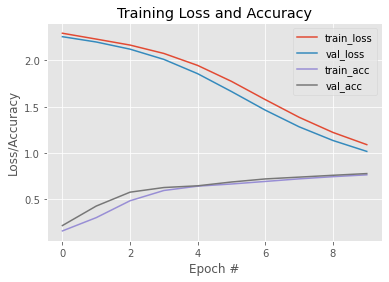

In [7]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()